In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
image = cv2.imread('images/faces_001.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [3]:
image.shape

(2456, 3680, 3)

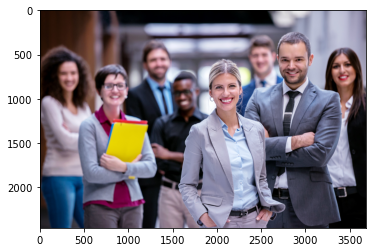

In [4]:
plt.imshow(image)

In [5]:
image = cv2.resize(image, (800,600))

In [6]:
image.shape

(600, 800, 3)

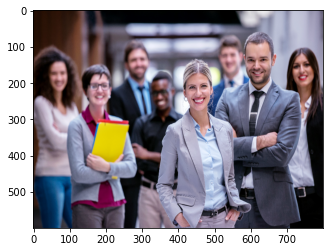

In [7]:
plt.imshow(image)

In [8]:
image_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

In [9]:
image_gray.shape

(600, 800)

In [10]:
#cv2.imshow("Gray",image_gray)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

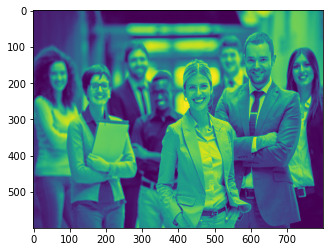

In [11]:
plt.imshow(image_gray)

## Detecting Faces

In [12]:
face_detector = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [13]:
detections = face_detector.detectMultiScale(image_gray)

In [14]:
detections

array([[147, 180,  76,  76],
       [411, 177,  91,  91],
       [453, 339,  59,  59],
       [714, 370,  49,  49],
       [507,  99,  70,  70],
       [320, 184, 110, 110],
       [571,  99,  99,  99],
       [257, 111,  68,  68],
       [704, 125,  77,  77],
       [ 35, 148,  69,  69],
       [514, 151,  64,  64]], dtype=int32)

In [15]:
len(detections) # faces detected

11

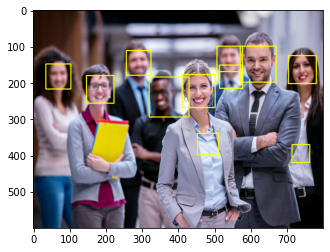

In [21]:
for (x,y,w,h) in detections:
    #print(x,y,w,h)
    cv2.rectangle(image, (x,y), (x+w,y+h), (255,255,0), 2)

plt.imshow(image)
#cv2.imshow('Detected',image)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

## Improve False Postive bounding box with Haarcascade parameters

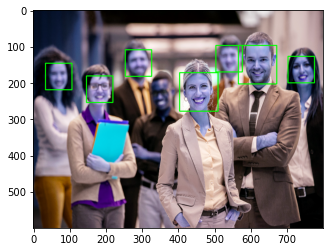

In [78]:
image = cv2.imread('images/faces_001.jpg')
#image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (800,600))
image_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
face_detector = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
detections = face_detector.detectMultiScale(image_gray, scaleFactor=1.45)  # parameter passed
for (x,y,w,h) in detections:
    cv2.rectangle(image, (x,y), (x+w, y+h), (0,255,0), 2)
plt.imshow(image)

cv2.imshow('Detected',image)
cv2.waitKey(0)
cv2.destroyAllWindows()

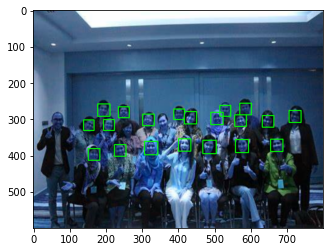

In [118]:
image = cv2.imread('images/faces_002.jpg')
#image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (800,600))
image_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
face_detector = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
#detections = face_detector.detectMultiScale(image_gray, scaleFactor=1.45, minNeighbors=6, minSize=(14,14), maxSize=(100,100)) # parameter passed
face_detections = face_detector.detectMultiScale(image_gray, scaleFactor=1.1) # parameter passed
for (x,y,w,h) in face_detections:
    #print(w,h)
    cv2.rectangle(image, (x,y), (x+w, y+h), (0,255,0), 2)
plt.imshow(image)

cv2.imshow('Detected',image)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Eye Detection

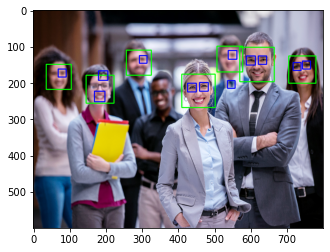

In [164]:
image = cv2.imread('images/faces_001.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (800,600))
image_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
face_detector = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_detector = cv2.CascadeClassifier('haarcascade_eye.xml')
#detections = face_detector.detectMultiScale(image_gray, scaleFactor=1.45, minNeighbors=6, minSize=(14,14), maxSize=(100,100)) # parameter passed
face_detections = face_detector.detectMultiScale(image_gray, scaleFactor=1.2) # parameter passed
for (x,y,w,h) in face_detections:
    cv2.rectangle(image, (x,y), (x+w, y+h), (0,255,0), 2)

eye_detections = eye_detector.detectMultiScale(image_gray, scaleFactor=1.12, maxSize=(35,35))
for (x,y,w,h) in eye_detections:
    #print(w,h)
    cv2.rectangle(image, (x,y), (x+w, y+h), (0,0,255), 2)

plt.imshow(image)

cv2.imshow('Detected',image)
cv2.waitKey(0)
cv2.destroyAllWindows()